In [1]:
import numpy 
import os
import ast
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#from wquantiles import quantile
from openfisca_survey_manager.utils import asof

#from openfisca_france_indirect_taxation import FranceIndirectTaxationTaxBenefitSystem
#from openfisca_france_indirect_taxation.surveys import SurveyScenario
#from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy
#from openfisca_france_indirect_taxation.almost_ideal_demand_system.utils import add_niveau_vie_decile

from openfisca_france_indirect_taxation.examples.utils_example import df_weighted_average_grouped
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Reform_carbon_tax import carbon_tax_rv
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Reform_carbon_tax_ext_margin import carbon_tax_rv_ext_margin
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Simulation_taxe_energie_winners_losers import (
    simulate_reformes_energie,
    run_all_elasticities)
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Graph_utils import (
    graph_CO2_emissions,
    graph_delta_CO2,
    graph_share_co2_emissions,
    graph_share_emissions_reduction,
    graph_ratio_emissions_reduction,
    graph_winners_losers,
    graph_net_transfers,
    graph_net_transfers_uc,
    graph_effort_rate,
    quantiles_for_boxplot,
    boxplot_effort_rate,
    boxplot_net_transfers,
    boxplot_net_transfers_uc
    )

In [2]:
data_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data"
output_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Output"
sns.set_style("whitegrid")

In [3]:
df_elasticities = pd.read_csv(os.path.join(data_path,'Reform_parameters/Elasticities_literature.csv'), sep = ";")
df_elasticities = df_elasticities.astype({'ref_elasticity': str, 'elas_price_1_1': float , 'elas_price_2_2' : float ,'elas_price_3_3' : float })

# exemple
elasticites_douenne = df_elasticities[df_elasticities['ref_elasticity'] == 'Douenne (2020)'] 

In [4]:
to_graph_ext_margin, menages_reform_ext_margin, df_sum_ext_margin = run_all_elasticities(data_elasticities = df_elasticities, year = 2019, reform = carbon_tax_rv_ext_margin,bonus_cheques_uc=True)

In [4]:
menages_reform_ext_margin = pd.read_csv(os.path.join(output_path,'Data/menages_reform_carbon_tax_rv_ext_margin.csv'), index_col = 0)
to_graph_ext_margin = pd.read_csv(os.path.join(output_path,'Data/to_graph_reform_carbon_tax_rv_ext_margin.csv'), index_col = 0)
df_sum_ext_margin = pd.read_csv(os.path.join(output_path,'Data/df_sum_reform_carbon_tax_rv_ext_margin.csv'), index_col = 0)

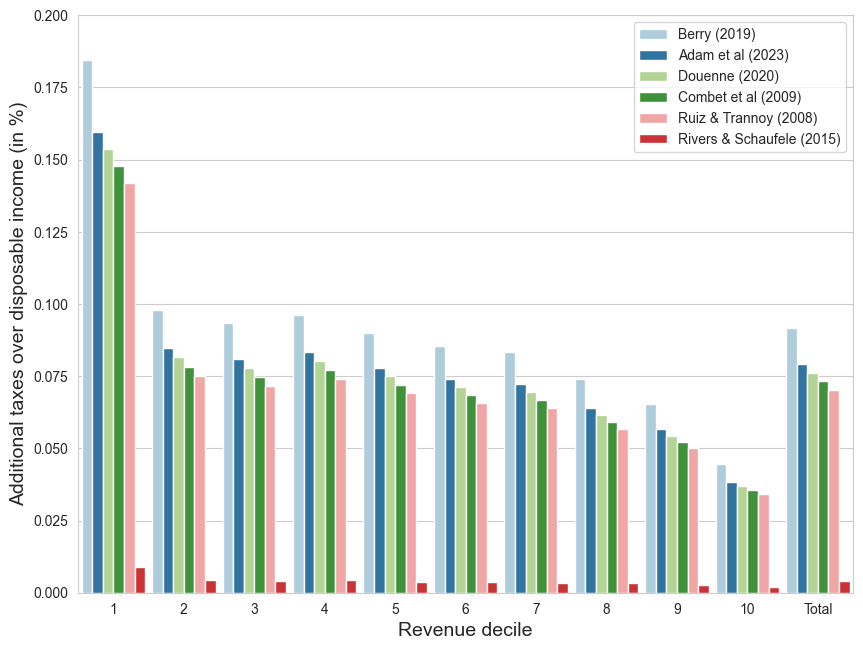

In [7]:
graph_effort_rate(to_graph_ext_margin,carbon_tax_rv_ext_margin,elas_vect = False,bonus_cheques_uc=True)

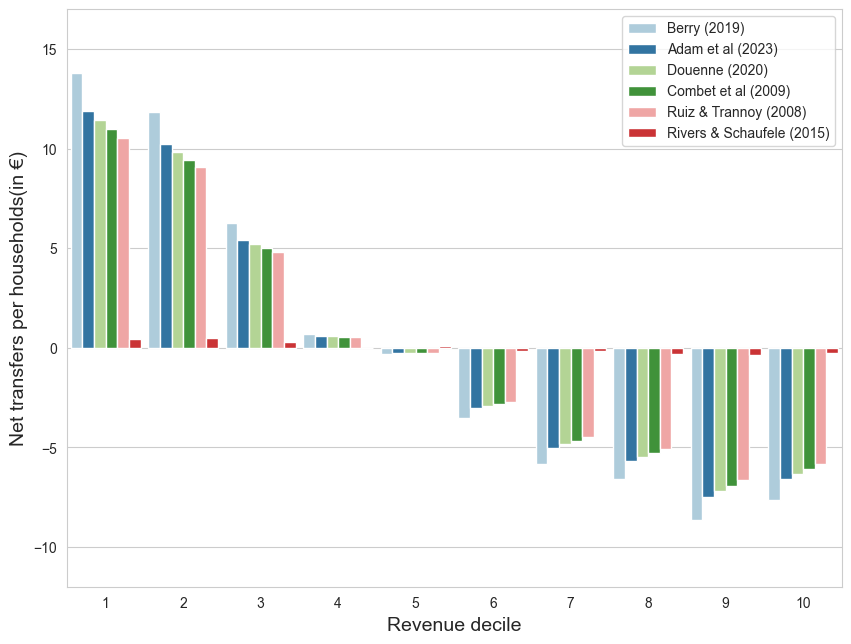

In [8]:
graph_net_transfers(to_graph_ext_margin,carbon_tax_rv_ext_margin,elas_vect = False,bonus_cheques_uc=True)

In [4]:
df_elas_vect = pd.read_csv(os.path.join(data_path,'Reform_parameters/Elasticities_Douenne_20.csv'), index_col = [0])
df_elas_vect = pd.melt(frame = df_elas_vect , id_vars = ["niveau_vie_decile",'ref_elasticity'], var_name = 'strate_2', value_name = 'elas_price_1_1')

In [5]:
to_graph_douenne_scal, menages_reform_douenne_scal, df_sum_douenne_scal = simulate_reformes_energie(elas_ext_margin = False, elas_vect = True, elasticites = df_elas_vect, year = 2019, reform = carbon_tax_rv,bonus_cheques_uc=True)
to_graph_douenne_vect, menages_reform_douenne_vect, df_sum_douenne_vect = simulate_reformes_energie(elas_ext_margin = False, elas_vect = False, elasticites = elasticites_douenne, year = 2019, reform = carbon_tax_rv,bonus_cheques_uc=True)
to_graph_douenne_ext, menages_reform_douenne_ext, df_sum_douenne_ext = simulate_reformes_energie(elas_ext_margin = True, elas_vect = False, elasticites = elasticites_douenne, year = 2019, reform = carbon_tax_rv_ext_margin ,bonus_cheques_uc=True)

to_graph_douenne_only = pd.concat([to_graph_douenne_scal, to_graph_douenne_vect, to_graph_douenne_ext])
menages_reform_douenne_only = pd.concat([menages_reform_douenne_scal, menages_reform_douenne_vect, menages_reform_douenne_ext])
df_sum_douenne_only = pd.concat([df_sum_douenne_scal, df_sum_douenne_vect, df_sum_douenne_ext])

menages_reform_douenne_only.to_csv(os.path.join(output_path,'Data/menages_reform_douenne_only.csv'))
to_graph_douenne_only.to_csv(os.path.join(output_path,'Data/to_graph_douenne_only.csv'))
df_sum_douenne_only.to_csv(os.path.join(output_path,'Data/df_sum_douenne_only.csv'))

(0.0, 0.2)

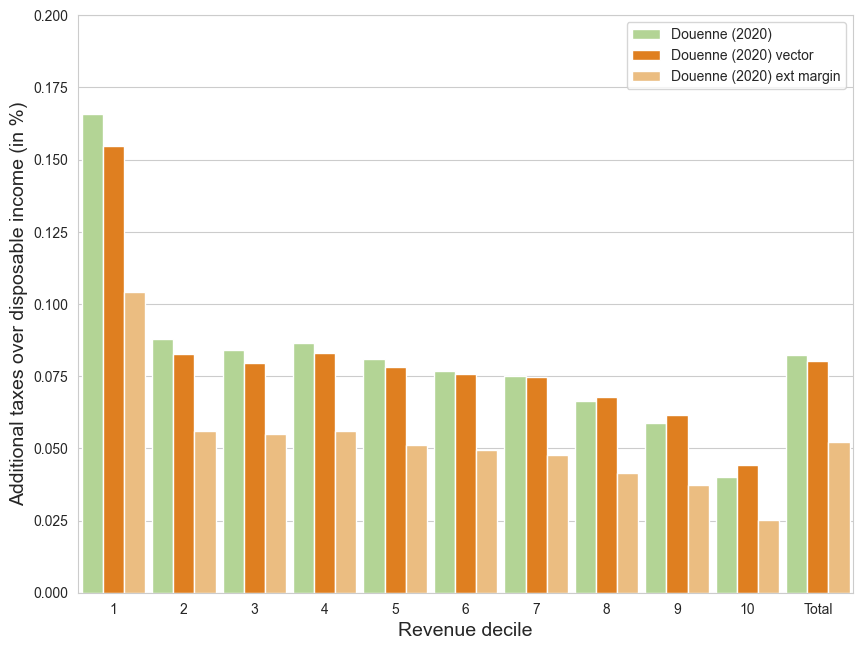

In [6]:
palette_douenne_vect = sns.color_palette([(0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (1.0, 0.4980392156862745, 0.0), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883)])
fig, ax = plt.subplots(figsize=(10, 7.5)) 
sns.barplot(x="niveau_vie_decile", y = 'Effort_rate', data = to_graph_douenne_only, hue = 'ref_elasticity', hue_order = ['Douenne (2020)' , 'Douenne (2020) vector', 'Douenne (2020) ext margin'], palette = palette_douenne_vect, width = .9)

plt.xlabel('Revenue decile', fontdict = {'fontsize' : 14})
plt.ylabel('Additional taxes over disposable income (in %)', fontdict = {'fontsize' : 14})
plt.legend()

y_max = 0.2
ax.set_ylim(ymin = 0 , ymax = y_max)

(-12.0, 17.0)

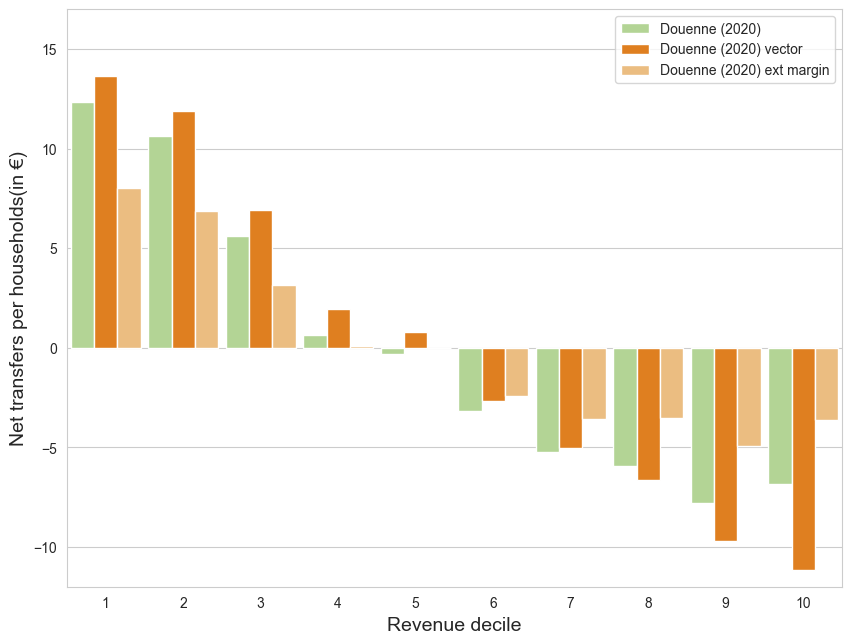

In [8]:
data = to_graph_douenne_only[to_graph_douenne_only['niveau_vie_decile'] != 'Total']
fig, ax = plt.subplots(figsize=(10, 7.5)) 
sns.barplot(x="niveau_vie_decile", y = 'Net_transfers_reform', data = data, hue = 'ref_elasticity', hue_order = ['Douenne (2020)' , 'Douenne (2020) vector', 'Douenne (2020) ext margin'], palette = palette_douenne_vect, width = .9)

plt.xlabel('Revenue decile', fontdict = {'fontsize' : 14})
plt.ylabel('Net transfers per households(in €)', fontdict = {'fontsize' : 14})
plt.legend()

y_min, y_max = -12 , 17
ax.set_ylim(ymin = y_min , ymax = y_max)

(0.0, 0.6)

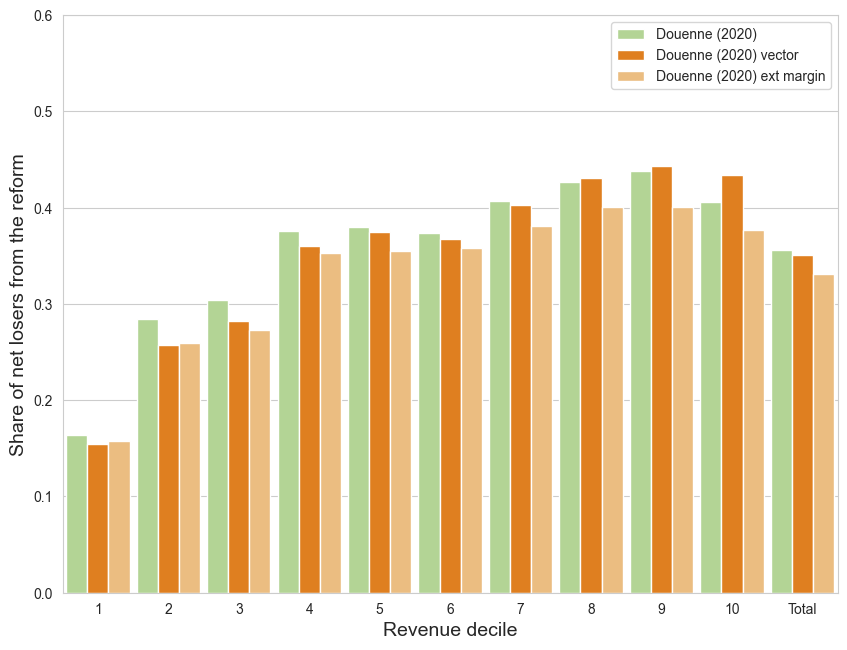

In [9]:
 fig, ax = plt.subplots(figsize=(10, 7.5)) 
sns.barplot(x="niveau_vie_decile", y = 'Is_losers', data = to_graph_douenne_only, hue = 'ref_elasticity', hue_order= ['Douenne (2020)', 'Douenne (2020) vector', 'Douenne (2020) ext margin'], palette = palette_douenne_vect, width = .9) 
plt.xlabel('Revenue decile', fontdict = {'fontsize' : 14})
plt.ylabel('Share of net losers from the reform', fontdict = {'fontsize' : 14})
plt.legend()

y_max = 0.6
ax.set_ylim(ymin = 0, ymax = y_max)